https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
train_df = train_df.sample(frac=1, random_state=595).reset_index(drop=1)
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

limit = round(len(train_df) * 0.8)

train_df["holdout"] = "train"
train_df.loc[limit:,"holdout"] = "test"
test_df["holdout"] = "validation"

df = train_df.append(test_df)
holdout = df["holdout"]
df = df.drop(["holdout"], axis=1)

/Users/caiooliveira/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# Define the target

In [3]:
target = df["SalePrice"]
df = df.drop(["SalePrice"], axis=1)

In [4]:
id = df["Id"]
df = df.drop(["Id"], axis=1)

--------

## select numeric features only

### drop this step for optimize the model

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8', 'bool']
df = df.select_dtypes(include=numerics)
df.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       872       521          0             3         0.0         0.0   
1       970       739          0             3         0.0         0.0   
2      1130      1054          0             3       936.0         0.0   
3       750       750          0             3         0.0         0.0   
4      1563         0          0             3        33.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallCond  \
0           0.0           0.0      816.0              0  ...            7   
1           0.0           0.0      970.0              0  ...            5   
2           1.0           0.0      168.0              0  ...            5   
3           0.0           0.0      750.0              0  ...            5   
4           0.0           0.0     1530.0              0  ...            5   

   OverallQual  PoolArea  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
0            5         0          265             8        816.0         121   
1            6         0            0             7        970.0           0   
2            9         0            0            10       1104.0           0   
3            6         0            0             6        750.0           0   
4            8         0            0             6       1563.0         144   

   YearBuilt  YearRemodAdd  YrSold  
0       1955          1955    2008  
1       2004          2006    2006  
2       2008          2008    2009  
3       2005          2006    2006  
4       2007          2007    2008  

[5 rows x 36 columns]

-------

# Exploratory Data Analysis

## correlated features

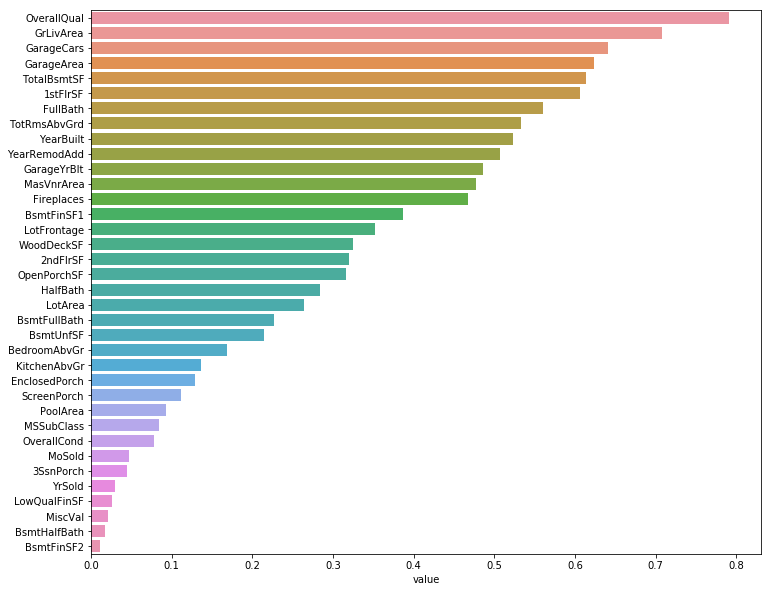

In [6]:
plt.figure(figsize=(12,10))

df_corr = pd.DataFrame(df.corrwith(target))
df_corr.columns = ["value"]
df_corr["value"] = np.abs(df_corr["value"])
df_corr = df_corr.sort_values(["value"], ascending=False)
sns.barplot(y=df_corr.index, x=df_corr["value"])

## scatterplots

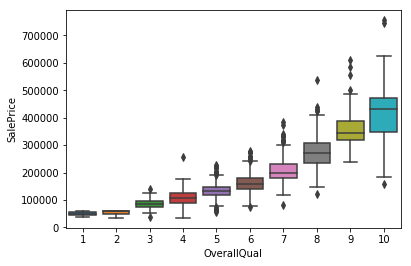

In [7]:
sns.boxplot(df["OverallQual"], target)

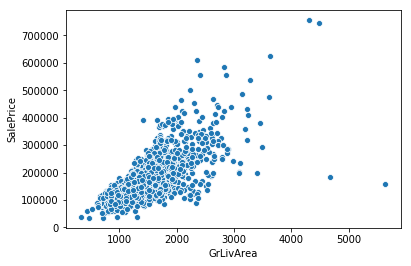

In [8]:
sns.scatterplot(df["GrLivArea"],target)

# Data Prep

## treat nan

In [9]:
df = df.fillna(0)

## split train and test

In [10]:
X_test = df[holdout == "test"]
X_validation = df[holdout == "validation"]
X = df[holdout == "train"]

y_test = target[holdout == "test"]
y = target[holdout == "train"]

# Modeling

## prepare model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = regressor.predict(X_test)

## evaluate model

In [14]:
from sklearn.metrics import r2_score

In [15]:
print("R2:", r2_score(y_test, y_pred))

R2: 0.7710609606405789


## submit file

In [16]:
y_pred_validation = regressor.predict(X_validation)

In [17]:
df_submit = pd.DataFrame({"Id":id[holdout=="validation"], "SalePrice":y_pred_validation})

In [19]:
df_submit.to_clipboard(index=False)